<a href="https://colab.research.google.com/github/youniselwahai1/2023.24-Final-Year-Project/blob/main/TestandTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Defining the needed file paths (dataset which was downloaded on https://www.kaggle.com/datasets/ghousethanedar/smiledetection/data) this files has images used in non-smile, smile, and test folders
non_smile_folder = '/content/drive/MyDrive/smilefakeandreal/non_smile/'
smile_folder = '/content/drive/MyDrive/smilefakeandreal/smile/'
test_folder = '/content/drive/MyDrive/smilefakeandreal/test/'

In [ ]:
# Importing the needed libraries for the test and training for the datset of smiles and non smiles
import numpy as np
import cv2  #  CV2 is very important as it an OpenCV library used in image processing which is requered
from imutils import paths  #  this is needed for file paths as we are using google drive to save the folder
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator  #  image data

# data extractor is a useful function which has the ability to extract the dataset image which in this cas is locacted from a folder
def data_extractor(folder_path, label):
    # getting the list
    image_paths = list(paths.list_images(folder_path))

    # here i am able to save the dataset images  and corresponding labels
    data = []  # saving the stored pics
    labels = []  # putting into smile or non-smile using the corresponding labels

    # here the code is able to iterate on every single each image path in the folder which would take some time as i have a meduim sized dataset
    for image_path in image_paths:
        # we used cv2 so for that reason we are able to use the image to be read by using the function called using OpenCV
        image = cv2.imread(image_path)

        # images to be tested and trained well it must be standerd pixels so for that matter we are bale to resize and the right pixs is 100x100
        image = cv2.resize(image, (100, 100)) #pixs is 100x100

        # convert images saved on dataset to be array and store it in the data list in this case
        image = img_to_array(image) #putting image into array as required to test and train the dataset
        data.append(image)

        # the images need to be assigned into eather one of two provided labels which is simply smile or non-smile
        labels.append(label)

    # Converting to numpy to give output numbers
    return np.array(data), np.array(labels)

# here i am able to define the needed downloaded images paths to the dataset which would then extract
non_smile_folder = '/content/drive/MyDrive/smilefakeandreal/non_smile/'
smile_folder = '/content/drive/MyDrive/smilefakeandreal/smile/'
test_folder = '/content/drive/MyDrive/smilefakeandreal/test/'

# here is the main aspect of code as it is exctating the data which in this case would be tthe training data for non-smile images
train_X, train_y = data_extractor(non_smile_folder, label=0)

# now  i am able to extract test data  but i would use a basic method as its moe realiable to function as required
test_X_smile, test_y_smile = data_extractor(smile_folder, label=1)
test_X_non_smile, test_y_non_smile = data_extractor(non_smile_folder, label=0)

# now with both tested data in this case would be te smile and non smile i could put them both into 1
test_X = np.concatenate((test_X_smile, test_X_non_smile), axis=0)
test_y = np.concatenate((test_y_smile, test_y_non_smile), axis=0)

# testing could be reshaped incase there is an issue with the pixs
test_y = test_y.reshape((-1, 1))

# now the testing is complated i would be bale to output the tested information but adavnced level
total_images = test_X.shape[0]  # Total number of images which is stored on testing
smile_images = np.sum(test_y == 1)  # smile number
non_smile_images = total_images - smile_images  # non smile number

# using print statements which is simple but yet a good choice to show
print(" Test Information:")
print(f"Total amount of downloaded images are currently: {total_images}")
print(f"The current number of smile images: {smile_images}")
print(f"The current number of non-smile images: {non_smile_images}")
print("Test Data (Images) Shape:", test_X.shape)
print("Test Labels Shape:", test_y.shape)


 Test Information:
Total amount of downloaded images are currently: 1203
The current number of smile images: 600
The current number of non-smile images: 603
Test Data (Images) Shape: (1203, 100, 100, 3)
Test Labels Shape: (1203, 1)


Epoch 1/15
19/19 [==============================] - 20s 988ms/step - loss: 0.0395 - accuracy: 0.9834 - val_loss: 73.2377 - val_accuracy: 0.5012
Epoch 2/15
19/19 [==============================] - 19s 996ms/step - loss: 1.2221e-32 - accuracy: 1.0000 - val_loss: 102.5627 - val_accuracy: 0.5012
Epoch 3/15
19/19 [==============================] - 22s 1s/step - loss: 1.5095e-37 - accuracy: 1.0000 - val_loss: 108.2159 - val_accuracy: 0.5012
Epoch 4/15
19/19 [==============================] - 18s 964ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 109.1445 - val_accuracy: 0.5012
Epoch 5/15
19/19 [==============================] - 24s 1s/step - loss: 3.6346e-37 - accuracy: 1.0000 - val_loss: 109.2884 - val_accuracy: 0.5012
Epoch 6/15
19/19 [==============================] - 18s 989ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 109.3101 - val_accuracy: 0.5012
Epoch 7/15
19/19 [==============================] - 18s 977ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 

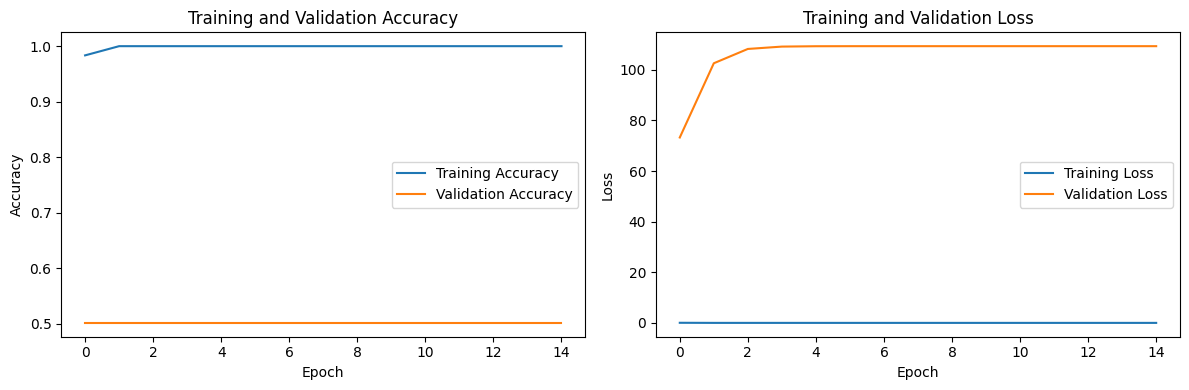

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Function to load and preprocess images from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize the image to (100, 100)
            img = img.astype('float32') / 255.0  # Normalize pixel values to be between 0 and 1
            images.append(img)
            labels.append(label)  # Assign label based on argument 'label'
    return np.array(images), np.array(labels)

# Define folder paths
non_smile_folder = '/content/drive/MyDrive/smilefakeandreal/non_smile/'
smile_folder = '/content/drive/MyDrive/smilefakeandreal/smile/'
test_folder = '/content/drive/MyDrive/smilefakeandreal/test/'

# Load images from folders
non_smile_images, non_smile_labels = load_images_from_folder(non_smile_folder, label=0)
smile_images, smile_labels = load_images_from_folder(smile_folder, label=1)
test_images, test_labels = load_images_from_folder(test_folder, label=2)

# Concatenate smile and non-smile images and labels for test data
test_X = np.concatenate((smile_images, non_smile_images), axis=0)
test_y = np.concatenate((smile_labels, non_smile_labels), axis=0)

# Reshape test labels if needed
test_y = test_y.reshape((-1, 1))

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Train the model
history = model.fit(datagen.flow(non_smile_images, non_smile_labels, batch_size=32),
                    epochs=15, validation_data=(test_X, test_y), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f"Test accuracy: {test_acc}")

# Function to plot accuracy and loss curves
def plot_curves(history):
    plt.figure(figsize=(12, 4))

    # Training and validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training and validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot accuracy and loss curves
plot_curves(history)


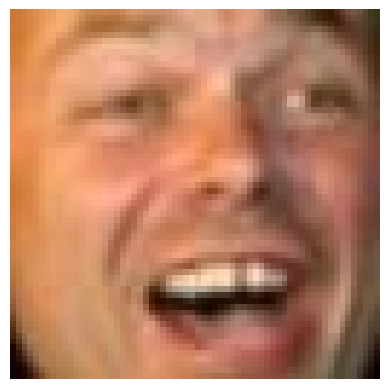

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detect_smiles(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/smilefakeandreal/smile/Jan_Bjoerklund_0001.jpg'
detect_smiles(image_path)


In [ ]:
import numpy as np
import cv2
from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define paths to the dataset folders
non_smile_folder = '/content/drive/MyDrive/smilefakeandreal/non_smile/'
smile_folder = '/content/drive/MyDrive/smilefakeandreal/smile/'
test_folder = '/content/drive/MyDrive/smilefakeandreal/test/'

# Function to load and preprocess image data
def load_images(folder_path, label):
    image_paths = list(paths.list_images(folder_path))
    data = []
    labels = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100))  # Resize images to 100x100 pixels
        image = img_to_array(image)
        data.append(image)
        labels.append(label)
    return np.array(data), np.array(labels)

# Load data for training and testing
train_X_non_smile, train_y_non_smile = load_images(non_smile_folder, label=0)
train_X_smile, train_y_smile = load_images(smile_folder, label=1)

train_X = np.concatenate((train_X_non_smile, train_X_smile), axis=0)
train_y = np.concatenate((train_y_non_smile, train_y_smile), axis=0)

test_X, test_y = load_images(test_folder, label=1)  # Load test data (smile images)

# Define the AI model architecture
model = Sequential([
    Flatten(input_shape=(100, 100, 3)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
38/38 [==============================] - 20s 506ms/step - loss: 127.2165 - accuracy: 0.4896 - val_loss: 1.3807 - val_accuracy: 0.8155
Epoch 2/10
38/38 [==============================] - 5s 137ms/step - loss: 5.4388 - accuracy: 0.6426 - val_loss: 2.3299 - val_accuracy: 0.7490
Epoch 3/10
38/38 [==============================] - 6s 164ms/step - loss: 2.6045 - accuracy: 0.7639 - val_loss: 5.0103 - val_accuracy: 0.5194
Epoch 4/10
38/38 [==============================] - 8s 207ms/step - loss: 5.0306 - accuracy: 0.6733 - val_loss: 10.9482 - val_accuracy: 0.3365
Epoch 5/10
38/38 [==============================] - 5s 139ms/step - loss: 1.5614 - accuracy: 0.8337 - val_loss: 24.0423 - val_accuracy: 0.1013
Epoch 6/10
38/38 [==============================] - 12s 330ms/step - loss: 1.3234 - accuracy: 0.8321 - val_loss: 18.3515 - val_accuracy: 0.1676
Epoch 7/10
38/38 [==============================] - 5s 142ms/step - loss: 1.4674 - accuracy: 0.8296 - val_loss: 10.5989 - val_accuracy: 0.339